## Problem: Find the values of unknown variables in the given parametric equation of a curve :

In [1]:
import numpy as np 
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\SUMAN\Downloads\xy_data.csv")
df.head()

,x,y
0,88.364456,57.784378
1,74.283936,54.406780
2,60.256474,46.311462
3,82.134370,57.717567
4,101.036390,67.849340


So here the observe value of x and y are given 

In [4]:
len(df)

1500

we can see there are total 1500 data points are there 

# The parametric equations are 

## x=t*np.cos(theta)-np.exp(M*np.abs(t))*np.sin(0.3*t)*np.sin(theta)+X
## y=42+t*np.sin(theta)+np.exp(M*np.abs(t))*np.sin(0.3*t)*np.cos(theta)
for 
6<t<60

# For the parameters theta,M,X



In [15]:
# Now we get different values of (x,y) for different t So we assume t is equally distributed between 6 and 60
t=np.linspace(6,60,1500)

# This function simply takes value of t and parameters  and give x_pred and y_pred

In [21]:
# Now we define a function which basically takes unknown parameters and a value of t and gives the predicted value of x and y from equation given 
def predict_model(parameter,t):
    theta_deg,M,X=parameter
    theta=np.deg2rad(theta_deg)
    x=t*np.cos(theta)-np.exp(M*np.abs(t))*np.sin(0.3*t)*np.sin(theta)+X
    y=42+t*np.sin(theta)+np.exp(M*np.abs(t))*np.sin(0.3*t)*np.cos(theta)
    return x, y

# This function basically gives a numpy array of difference between x_pred and x_org 

In [22]:
# Now define a function which calculate the residual error between original and prediction 
def residual(params,t,x_org,y_org):
    x_pred,y_pred=predict_model(params,t)
    return np.concatenate([(x_pred-x_org),(y_pred-y_org)]) # the residual error 

## We use SciPy’s least_squares to minimize total squared error.It kind of advanced version of gradient descent designed specifically for curve fitting and parameter estimation.

In [27]:
from scipy.optimize import least_squares
init_guess=[25,0.0,50] # for initial guess we take midpoints of lower and upper bounds   
lower_bounds=[0,-0.05,0]
upper_bounds=[50,0.05,100]
x_org=df['x'].values
y_org=df['y'].values


result=least_squares(
    residual,
    init_guess,
    bounds=(lower_bounds,upper_bounds),
    args=(t,x_data,y_data)
)


## Optimal Solution is 

In [ ]:
print("optimal parameter for which we get minimal error is [theta,M,X]:",result.x)

optimal parameter for which we get minimal error is: [ 2.95822858e+01 -4.99999997e-02  5.50134594e+01]


## We also plot the curve to see how much they fit original data 

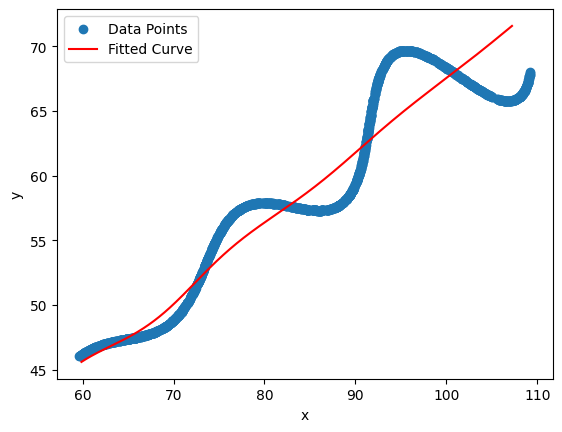

In [29]:
import matplotlib.pyplot as plt
t= np.linspace(6,60,1500)
x_fit,y_fit=predict_model(result.x,t)

plt.scatter(x_org,y_org,label='Data Points')
plt.plot(x_fit,y_fit,'r-',label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## L1 Distance

In [31]:
x_pred,y_pred = predict_model(result.x,t)
l1_distance=np.mean(np.abs(x_org-x_pred)+np.abs(y_org-y_pred))
print("L1 Distance is :",l1_distance)


L1 Distance is : 25.401436384769116
